# long data 만들기

- 각 변수는 하나의 컬럼에 배치
- 각 관측치는 한 행에 1건씩 분리되어 배치
- 각 값은 개별 셀에 배치

- melt()
- pivot()
- pivot_table() : 집계 함수를 적용

In [47]:
# pew data load
# C:\Users\Admin\hipython\data

In [48]:
import pandas as pd
pd.read_csv(r'C:\Users\Admin\hipython\data\pew.csv') #raw-string
df = pd.read_csv('./data/pew.csv')
type(df)
df

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76
2,Buddhist,27,21,30,34,33,58,62,39,53,54
3,Catholic,418,617,732,670,638,1116,949,792,633,1489
4,Don’t know/refused,15,14,15,11,10,35,21,17,18,116
5,Evangelical Prot,575,869,1064,982,881,1486,949,723,414,1529
6,Hindu,1,9,7,9,11,34,47,48,54,37
7,Historically Black Prot,228,244,236,238,197,223,131,81,78,339
8,Jehovah's Witness,20,27,24,24,21,30,15,11,6,37
9,Jewish,19,19,25,25,30,95,69,87,151,162


In [49]:
df.info()
df.head()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   religion            18 non-null     object
 1   <$10k               18 non-null     int64 
 2   $10-20k             18 non-null     int64 
 3   $20-30k             18 non-null     int64 
 4   $30-40k             18 non-null     int64 
 5   $40-50k             18 non-null     int64 
 6   $50-75k             18 non-null     int64 
 7   $75-100k            18 non-null     int64 
 8   $100-150k           18 non-null     int64 
 9   >150k               18 non-null     int64 
 10  Don't know/refused  18 non-null     int64 
dtypes: int64(10), object(1)
memory usage: 1.7+ KB


,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,107.222222,154.500000,186.500000,183.444444,171.388889,288.055556,221.666667,177.611111,144.888889,340.055556
std,168.931784,255.172433,309.891869,291.470354,271.144446,458.442436,345.078849,275.679724,205.224952,530.523878
min,1.000000,2.000000,3.000000,4.000000,2.000000,7.000000,3.000000,4.000000,4.000000,8.000000
25%,12.250000,14.750000,17.000000,15.750000,15.000000,34.250000,25.250000,22.500000,23.750000,41.250000
50%,20.000000,27.000000,33.500000,40.000000,34.000000,66.500000,65.500000,48.500000,53.500000,74.500000
75%,170.000000,193.000000,192.000000,198.750000,166.750000,201.500000,128.750000,103.500000,134.250000,294.750000
max,575.000000,869.000000,1064.000000,982.000000,881.000000,1486.000000,949.000000,792.000000,634.000000,1529.000000


In [50]:
df.melt(id_vars='religion').sort_values('religion').head(18) #메소드체인

,religion,variable,value
0,Agnostic,<$10k,27
144,Agnostic,>150k,84
162,Agnostic,Don't know/refused,96
126,Agnostic,$100-150k,109
36,Agnostic,$20-30k,60
108,Agnostic,$75-100k,122
18,Agnostic,$10-20k,34
90,Agnostic,$50-75k,137
72,Agnostic,$40-50k,76
54,Agnostic,$30-40k,81


In [61]:
df_melt_new= df.melt(id_vars='religion', var_name= 'income', value_name='count')
df_melt_new

,religion,income,count
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
...,...,...,...
175,Orthodox,Don't know/refused,73
176,Other Christian,Don't know/refused,18
177,Other Faiths,Don't know/refused,71
178,Other World Religions,Don't know/refused,8


In [64]:
df_pivot = df_melt_new.pivot( #long data > wide data
  index='religion',
  columns='income',
  values='count'
)


In [66]:
df_pivot

income,$10-20k,$100-150k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,<$10k,>150k,Don't know/refused
religion,,,,,,,,,,
Agnostic,34,109,60,81,76,137,122,27,84,96
Atheist,27,59,37,52,35,70,73,12,74,76
Buddhist,21,39,30,34,33,58,62,27,53,54
Catholic,617,792,732,670,638,1116,949,418,633,1489
Don’t know/refused,14,17,15,11,10,35,21,15,18,116
Evangelical Prot,869,723,1064,982,881,1486,949,575,414,1529
Hindu,9,48,7,9,11,34,47,1,54,37
Historically Black Prot,244,81,236,238,197,223,131,228,78,339
Jehovah's Witness,27,11,24,24,21,30,15,20,6,37


In [67]:
#.reset_index() >> religion 없어짐
df_pivot.reset_index()

income,religion,$10-20k,$100-150k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,<$10k,>150k,Don't know/refused
0,Agnostic,34,109,60,81,76,137,122,27,84,96
1,Atheist,27,59,37,52,35,70,73,12,74,76
2,Buddhist,21,39,30,34,33,58,62,27,53,54
3,Catholic,617,792,732,670,638,1116,949,418,633,1489
4,Don’t know/refused,14,17,15,11,10,35,21,15,18,116
5,Evangelical Prot,869,723,1064,982,881,1486,949,575,414,1529
6,Hindu,9,48,7,9,11,34,47,1,54,37
7,Historically Black Prot,244,81,236,238,197,223,131,228,78,339
8,Jehovah's Witness,27,11,24,24,21,30,15,20,6,37
9,Jewish,19,87,25,25,30,95,69,19,151,162


In [52]:
df_melt.loc[df_melt['religion']=='Agnostic']

,religion,variable,value
0,Agnostic,<$10k,27
18,Agnostic,$10-20k,34
36,Agnostic,$20-30k,60
54,Agnostic,$30-40k,81
72,Agnostic,$40-50k,76
90,Agnostic,$50-75k,137
108,Agnostic,$75-100k,122
126,Agnostic,$100-150k,109
144,Agnostic,>150k,84
162,Agnostic,Don't know/refused,96


In [53]:
df_melt_rename = df_melt.rename(columns={'variable':'income','value':'count'})
df_melt_rename

,religion,income,count
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
...,...,...,...
175,Orthodox,Don't know/refused,73
176,Other Christian,Don't know/refused,18
177,Other Faiths,Don't know/refused,71
178,Other World Religions,Don't know/refused,8


# 빌보드 데이터 

In [59]:
df_bb = pd.read_csv('./data/billboard.csv')
df_bb

,year,artist,track,time,date.entered,wk1,wk2,wk3,wk4,wk5,...,wk67,wk68,wk69,wk70,wk71,wk72,wk73,wk74,wk75,wk76
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,87,82.0,72.0,77.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,91,87.0,92.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,81,70.0,68.0,67.0,66.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,3 Doors Down,Loser,4:24,2000-10-21,76,76.0,72.0,69.0,67.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,57,34.0,25.0,17.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,2000,Yankee Grey,Another Nine Minutes,3:10,2000-04-29,86,83.0,77.0,74.0,83.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
313,2000,"Yearwood, Trisha",Real Live Woman,3:55,2000-04-01,85,83.0,83.0,82.0,81.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
314,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18,95,94.0,91.0,85.0,84.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
315,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02,99,99.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
df_bb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 81 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          317 non-null    int64  
 1   artist        317 non-null    object 
 2   track         317 non-null    object 
 3   time          317 non-null    object 
 4   date.entered  317 non-null    object 
 5   wk1           317 non-null    int64  
 6   wk2           312 non-null    float64
 7   wk3           307 non-null    float64
 8   wk4           300 non-null    float64
 9   wk5           292 non-null    float64
 10  wk6           280 non-null    float64
 11  wk7           269 non-null    float64
 12  wk8           260 non-null    float64
 13  wk9           253 non-null    float64
 14  wk10          244 non-null    float64
 15  wk11          236 non-null    float64
 16  wk12          222 non-null    float64
 17  wk13          210 non-null    float64
 18  wk14          204 non-null    

In [55]:
df_bb.columns

Index(['year', 'artist', 'track', 'time', 'date.entered', 'wk1', 'wk2', 'wk3',
       'wk4', 'wk5', 'wk6', 'wk7', 'wk8', 'wk9', 'wk10', 'wk11', 'wk12',
       'wk13', 'wk14', 'wk15', 'wk16', 'wk17', 'wk18', 'wk19', 'wk20', 'wk21',
       'wk22', 'wk23', 'wk24', 'wk25', 'wk26', 'wk27', 'wk28', 'wk29', 'wk30',
       'wk31', 'wk32', 'wk33', 'wk34', 'wk35', 'wk36', 'wk37', 'wk38', 'wk39',
       'wk40', 'wk41', 'wk42', 'wk43', 'wk44', 'wk45', 'wk46', 'wk47', 'wk48',
       'wk49', 'wk50', 'wk51', 'wk52', 'wk53', 'wk54', 'wk55', 'wk56', 'wk57',
       'wk58', 'wk59', 'wk60', 'wk61', 'wk62', 'wk63', 'wk64', 'wk65', 'wk66',
       'wk67', 'wk68', 'wk69', 'wk70', 'wk71', 'wk72', 'wk73', 'wk74', 'wk75',
       'wk76'],
      dtype='object')

In [56]:
bb_id_vars = df_bb.columns[:5].tolist()
bb_id_vars

['year', 'artist', 'track', 'time', 'date.entered']

In [58]:
df_bb_melt = df_bb.melt(id_vars=bb_id_vars, var_name='week', value_name='rank')
df_bb_melt

,year,artist,track,time,date.entered,week,rank
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,wk1,91.0
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,wk1,81.0
3,2000,3 Doors Down,Loser,4:24,2000-10-21,wk1,76.0
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,wk1,57.0
...,...,...,...,...,...,...,...
24087,2000,Yankee Grey,Another Nine Minutes,3:10,2000-04-29,wk76,NaN
24088,2000,"Yearwood, Trisha",Real Live Woman,3:55,2000-04-01,wk76,NaN
24089,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18,wk76,NaN
24090,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02,wk76,NaN


# apply()

In [68]:
df = pd.DataFrame(
  {'a':[10,20,30],
   'b':[20,30,40]}
)
df

,a,b
0,10,20
1,20,30
2,30,40


In [69]:
df ** 2

,a,b
0,100,400
1,400,900
2,900,1600


In [70]:
df/10

,a,b
0,1.0,2.0
1,2.0,3.0
2,3.0,4.0


In [74]:
def make_sq(x, e=2):
  return x ** e

In [76]:
df.apply(make_sq, e=3)

,a,b
0,1000,8000
1,8000,27000
2,27000,64000


In [77]:
import pandas as pd

# 직원 명단 DataFrame 생성
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'Age': [25, 45, 35, 32, 28],
    'Salary': [5000, 7000, 6500, 5500, 6000]
}
df_sal = pd.DataFrame(data)
df_sal

,Name,Age,Salary
0,Alice,25,5000
1,Bob,45,7000
2,Charlie,35,6500
3,David,32,5500
4,Eva,28,6000


In [86]:
def age_c(age) :
  if  age <= 20 :
    return '10대'
  elif age <= 30 :
    return '20대'
  elif age <= 40 :
    return '30대'
  elif age <= 50 :
    return '40대'
  else : 
    return '50대 이상'

In [87]:
df_sal['Age Category'] = df_sal['Age'].apply(age_c)
df_sal

,Name,Age,Salary,Age Category,Bonus
0,Alice,25,5000,20대,1000.0
1,Bob,45,7000,40대,1400.0
2,Charlie,35,6500,30대,1300.0
3,David,32,5500,30대,1100.0
4,Eva,28,6000,20대,1200.0


In [ ]:
# 보너스 컬럼 20%

In [92]:
def bonus(salary, r=0.2) :
  return salary*r

In [93]:
df_sal['Bonus'] = df_sal['Salary'].apply(bonus, r=0.3)
df_sal

,Name,Age,Salary,Age Category,Bonus
0,Alice,25,5000,20대,1500.0
1,Bob,45,7000,40대,2100.0
2,Charlie,35,6500,30대,1950.0
3,David,32,5500,30대,1650.0
4,Eva,28,6000,20대,1800.0


In [90]:
df_sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          5 non-null      object 
 1   Age           5 non-null      int64  
 2   Salary        5 non-null      int64  
 3   Age Category  5 non-null      object 
 4   Bonus         5 non-null      float64
dtypes: float64(1), int64(2), object(2)
memory usage: 328.0+ bytes


# 데이터 병합

In [1]:
import pandas as pd

In [3]:
df_con_1 = pd.read_csv('./data/concat_1.csv')
df_con_2 = pd.read_csv('./data/concat_2.csv')
df_con_3 = pd.read_csv('./data/concat_3.csv')

In [4]:
df_con_1, df_con_2, df_con_3

(    A   B   C   D
 0  a0  b0  c0  d0
 1  a1  b1  c1  d1
 2  a2  b2  c2  d2
 3  a3  b3  c3  d3,
     A   B   C   D
 0  a4  b4  c4  d4
 1  a5  b5  c5  d5
 2  a6  b6  c6  d6
 3  a7  b7  c7  d7,
      A    B    C    D
 0   a8   b8   c8   d8
 1   a9   b9   c9   d9
 2  a10  b10  c10  d10
 3  a11  b11  c11  d11)

In [5]:
# column list 가 동일하면 병합 가능,, 열 갯수는 달라도 가능
df_con_total = pd.concat([df_con_1, df_con_2, df_con_3], ignore_index=True)
df_con_total

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
4,a4,b4,c4,d4
5,a5,b5,c5,d5
6,a6,b6,c6,d6
7,a7,b7,c7,d7
8,a8,b8,c8,d8
9,a9,b9,c9,d9


In [104]:
df_con_total.loc[3]

A    a3
B    b3
C    c3
D    d3
Name: 3, dtype: object

In [105]:
df_con_total.iloc[3]

A    a3
B    b3
C    c3
D    d3
Name: 3, dtype: object

In [109]:
df_con_total.reset_index()

,index,A,B,C,D
0,0,a0,b0,c0,d0
1,1,a1,b1,c1,d1
2,2,a2,b2,c2,d2
3,3,a3,b3,c3,d3
4,4,a4,b4,c4,d4
5,5,a5,b5,c5,d5
6,6,a6,b6,c6,d6
7,7,a7,b7,c7,d7
8,8,a8,b8,c8,d8
9,9,a9,b9,c9,d9


## 새로운 행 추가

In [6]:
add_ser = pd.Series(['a100','b100','c100','d100'])
add_ser

0    a100
1    b100
2    c100
3    d100
dtype: object

In [23]:
df_total_add = pd.concat([df_con_total,add_ser])
df_total_add

,A,B,C,D,0
0,a0,b0,c0,d0,NaN
1,a1,b1,c1,d1,NaN
2,a2,b2,c2,d2,NaN
3,a3,b3,c3,d3,NaN
4,a4,b4,c4,d4,NaN
5,a5,b5,c5,d5,NaN
6,a6,b6,c6,d6,NaN
7,a7,b7,c7,d7,NaN
8,a8,b8,c8,d8,NaN
9,a9,b9,c9,d9,NaN


In [24]:
col_list = df_con_total.columns.to_list()
col_list

['A', 'B', 'C', 'D']

In [25]:
df_empty = pd.DataFrame(columns=col_list)
df_empty

,A,B,C,D


In [34]:
add_ser.index = df_empty.columns
add_ser

A    a100
B    b100
C    c100
D    d100
dtype: object

In [36]:
df_empty.loc[0] = add_ser
df_empty

,A,B,C,D
0,a100,b100,c100,d100


In [37]:
new_total_df = pd.concat([df_con_total, df_empty],ignore_index=True)
new_total_df

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
4,a4,b4,c4,d4
5,a5,b5,c5,d5
6,a6,b6,c6,d6
7,a7,b7,c7,d7
8,a8,b8,c8,d8
9,a9,b9,c9,d9


시리즈를 행으로 만들어서 concat

- 원본과 동일한 컬럼을 갖는 빈데이터프레임
- 컬럼이름 = 인덱스이름 인 시리즈 생성
- 빈데이터프레임에 행으로 시리즈를 추가
- concat(원본, 빈데이터프레임)

## 합치기 연습

In [2]:
df_1 = pd.read_csv('./data/concat_1.csv')
df_2 = pd.read_csv('./data/concat_2.csv')
df_3 = pd.read_csv('./data/concat_3.csv')

In [3]:
df_1, df_2, df_3

(    A   B   C   D
 0  a0  b0  c0  d0
 1  a1  b1  c1  d1
 2  a2  b2  c2  d2
 3  a3  b3  c3  d3,
     A   B   C   D
 0  a4  b4  c4  d4
 1  a5  b5  c5  d5
 2  a6  b6  c6  d6
 3  a7  b7  c7  d7,
      A    B    C    D
 0   a8   b8   c8   d8
 1   a9   b9   c9   d9
 2  a10  b10  c10  d10
 3  a11  b11  c11  d11)

In [4]:
df_total = pd.concat([df_1,df_2, df_3],ignore_index=True)
df_total

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
4,a4,b4,c4,d4
5,a5,b5,c5,d5
6,a6,b6,c6,d6
7,a7,b7,c7,d7
8,a8,b8,c8,d8
9,a9,b9,c9,d9


### 새로운 행 붙이기

In [5]:
series_add = pd.Series(['a100','b100','c100','d100'])
series_add

0    a100
1    b100
2    c100
3    d100
dtype: object

In [6]:
pd.concat([df_total,series_add])
#이러면 내가 원하는 형태로 안붙여짐!

,A,B,C,D,0
0,a0,b0,c0,d0,NaN
1,a1,b1,c1,d1,NaN
2,a2,b2,c2,d2,NaN
3,a3,b3,c3,d3,NaN
4,a4,b4,c4,d4,NaN
5,a5,b5,c5,d5,NaN
6,a6,b6,c6,d6,NaN
7,a7,b7,c7,d7,NaN
8,a8,b8,c8,d8,NaN
9,a9,b9,c9,d9,NaN


In [7]:
col_name = df_total.columns.to_list()
col_name

['A', 'B', 'C', 'D']

In [8]:
ser_link = pd.DataFrame(columns=col_name)
ser_link

,A,B,C,D


In [9]:
series_add.index = ser_link.columns
series_add

A    a100
B    b100
C    c100
D    d100
dtype: object

In [10]:
ser_link.loc[0] = series_add
ser_link

,A,B,C,D
0,a100,b100,c100,d100


In [12]:
pd.concat([df_total, ser_link],ignore_index=True)

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
4,a4,b4,c4,d4
5,a5,b5,c5,d5
6,a6,b6,c6,d6
7,a7,b7,c7,d7
8,a8,b8,c8,d8
9,a9,b9,c9,d9


### 다시 연습해 보기

In [13]:
df_total

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
4,a4,b4,c4,d4
5,a5,b5,c5,d5
6,a6,b6,c6,d6
7,a7,b7,c7,d7
8,a8,b8,c8,d8
9,a9,b9,c9,d9


In [14]:
add_series = pd.Series(['a100','b100','c100','d100'])
add_series

0    a100
1    b100
2    c100
3    d100
dtype: object

In [15]:
column_name = df_total.columns.to_list()
column_name

['A', 'B', 'C', 'D']

In [16]:
cl_to_id = pd.DataFrame(columns=column_name)
cl_to_id

,A,B,C,D


In [17]:
add_series.index = cl_to_id.columns
add_series

A    a100
B    b100
C    c100
D    d100
dtype: object

In [18]:
cl_to_id.loc[0] = add_series
cl_to_id

,A,B,C,D
0,a100,b100,c100,d100


In [19]:
pd.concat([df_total, cl_to_id])

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
4,a4,b4,c4,d4
5,a5,b5,c5,d5
6,a6,b6,c6,d6
7,a7,b7,c7,d7
8,a8,b8,c8,d8
9,a9,b9,c9,d9


In [20]:
만든데이터 = pd.Series(['a100','b100','c100','d100'])
만든데이터

0    a100
1    b100
2    c100
3    d100
dtype: object

In [21]:
칼럼추출 = df_total.columns.to_list()
칼럼추출

['A', 'B', 'C', 'D']

In [22]:
임시데이터=pd.DataFrame(columns=칼럼추출)
임시데이터

,A,B,C,D


In [23]:
만든데이터.index = 임시데이터.columns
만든데이터

A    a100
B    b100
C    c100
D    d100
dtype: object

In [24]:
임시데이터.loc[0]=만든데이터
임시데이터

,A,B,C,D
0,a100,b100,c100,d100


In [25]:
pd.concat([df_total,임시데이터])

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
4,a4,b4,c4,d4
5,a5,b5,c5,d5
6,a6,b6,c6,d6
7,a7,b7,c7,d7
8,a8,b8,c8,d8
9,a9,b9,c9,d9


# 데이터 병합

## merge
- 키를 기준으로 합친다.
- SQL에서 JOIN 느낌.

In [5]:
import pandas as pd

In [13]:
#매출 데이터
sales_data = pd.DataFrame({ 
'CustomerID': [101, 102, 103, 104], 
'Date': ['2023-01-01', '2023-01-03', '2023-01-05', '2023-01-07'], 
'Amount': [250, 300, 150, 400] 
})
sales_data

,CustomerID,Date,Amount
0,101,2023-01-01,250
1,102,2023-01-03,300
2,103,2023-01-05,150
3,104,2023-01-07,400


In [12]:
#고객 데이터
customer_data = pd.DataFrame({'CustomerID': [101, 102, 103, 105], 'Name': ['Alice', 'Bob', 'Charlie', 'Eva'], 'Region': ['North', 'South', 'East', 'West'] })
customer_data

,CustomerID,Name,Region
0,101,Alice,North
1,102,Bob,South
2,103,Charlie,East
3,105,Eva,West


In [14]:
sales_data.info(), customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  4 non-null      int64 
 1   Date        4 non-null      object
 2   Amount      4 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 224.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  4 non-null      int64 
 1   Name        4 non-null      object
 2   Region      4 non-null      object
dtypes: int64(1), object(2)
memory usage: 224.0+ bytes


(None, None)

In [16]:
pd.merge(customer_data,sales_data,on='CustomerID')

,CustomerID,Name,Region,Date,Amount
0,101,Alice,North,2023-01-01,250
1,102,Bob,South,2023-01-03,300
2,103,Charlie,East,2023-01-05,150


In [17]:
pd.merge(customer_data,sales_data,how='left',on='CustomerID')

,CustomerID,Name,Region,Date,Amount
0,101,Alice,North,2023-01-01,250.0
1,102,Bob,South,2023-01-03,300.0
2,103,Charlie,East,2023-01-05,150.0
3,105,Eva,West,NaN,NaN


In [18]:
pd.merge(customer_data,sales_data,how='right',on='CustomerID')

,CustomerID,Name,Region,Date,Amount
0,101,Alice,North,2023-01-01,250
1,102,Bob,South,2023-01-03,300
2,103,Charlie,East,2023-01-05,150
3,104,NaN,NaN,2023-01-07,400


In [19]:
pd.merge(customer_data,sales_data,how='outer',on='CustomerID')

,CustomerID,Name,Region,Date,Amount
0,101,Alice,North,2023-01-01,250.0
1,102,Bob,South,2023-01-03,300.0
2,103,Charlie,East,2023-01-05,150.0
3,104,NaN,NaN,2023-01-07,400.0
4,105,Eva,West,NaN,NaN


how - 병합 기준 지정,,
- left
- right
- inner(default)
- outer

on - 병합을 위한 key 지정

# 그룹 연산 
groupby() + aggregation 집계


In [ ]:
gap_df = pd.read_csv('./data/gapminder.tsv',sep='\t')
gap_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


In [31]:
gap_df

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


In [36]:
gap_df.loc[:,'country']

0       Afghanistan
1       Afghanistan
2       Afghanistan
3       Afghanistan
4       Afghanistan
           ...     
1699       Zimbabwe
1700       Zimbabwe
1701       Zimbabwe
1702       Zimbabwe
1703       Zimbabwe
Name: country, Length: 1704, dtype: object

In [39]:
gap_df.iloc[:,0]

0       Afghanistan
1       Afghanistan
2       Afghanistan
3       Afghanistan
4       Afghanistan
           ...     
1699       Zimbabwe
1700       Zimbabwe
1701       Zimbabwe
1702       Zimbabwe
1703       Zimbabwe
Name: country, Length: 1704, dtype: object

In [ ]:
# .shape > 몇개인지 체크 .unique() > 중복 제거용
print(gap_df['country'].unique().shape)

(142,)


In [ ]:
gap_df['continent'].unique()
# 국가별로 그룹바이 하면 좋을듯??

array(['Asia', 'Europe', 'Africa', 'Americas', 'Oceania'], dtype=object)

In [45]:
gap_df['year'].unique()

array([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002,
       2007])

In [ ]:
# 대륙, 연도
# count(), size(), mean(), std(), quantile(), max(), min(), sum(), var(), describe()

In [57]:
gap_df.groupby('country')['lifeExp'].sum()

country
Afghanistan           449.746
Albania               821.195
Algeria               708.362
Angola                454.602
Argentina             828.725
                       ...   
Vietnam               689.754
West Bank and Gaza    723.944
Yemen, Rep.           561.365
Zambia                551.956
Zimbabwe              631.958
Name: lifeExp, Length: 142, dtype: float64

In [58]:
gap_df.groupby('country')[['lifeExp','pop']].sum()

,lifeExp,pop
country,,
Afghanistan,449.746,189884585
Albania,821.195,30962990
Algeria,708.362,238504874
Angola,454.602,87712681
Argentina,828.725,343226879
...,...,...
Vietnam,689.754,654822851
West Bank and Gaza,723.944,22183278
"Yemen, Rep.",561.365,130118302


In [59]:
gap_df.groupby('country').get_group('Angola')

,country,continent,year,lifeExp,pop,gdpPercap
36,Angola,Africa,1952,30.015,4232095,3520.610273
37,Angola,Africa,1957,31.999,4561361,3827.940465
38,Angola,Africa,1962,34.000,4826015,4269.276742
39,Angola,Africa,1967,35.985,5247469,5522.776375
40,Angola,Africa,1972,37.928,5894858,5473.288005
41,Angola,Africa,1977,39.483,6162675,3008.647355
42,Angola,Africa,1982,39.942,7016384,2756.953672
43,Angola,Africa,1987,39.906,7874230,2430.208311
44,Angola,Africa,1992,40.647,8735988,2627.845685
45,Angola,Africa,1997,40.963,9875024,2277.140884


In [61]:
gap_df.groupby('continent')['country'].describe()

,count,unique,top,freq
continent,,,,
Africa,624,52,Algeria,12
Americas,300,25,Argentina,12
Asia,396,33,Afghanistan,12
Europe,360,30,Albania,12
Oceania,24,2,Australia,12


In [63]:
gap_df.groupby('country').describe()

year                                                       \
                   count    mean        std     min      25%     50%      75%   
country                                                                         
Afghanistan         12.0  1979.5  18.027756  1952.0  1965.75  1979.5  1993.25   
Albania             12.0  1979.5  18.027756  1952.0  1965.75  1979.5  1993.25   
Algeria             12.0  1979.5  18.027756  1952.0  1965.75  1979.5  1993.25   
Angola              12.0  1979.5  18.027756  1952.0  1965.75  1979.5  1993.25   
Argentina           12.0  1979.5  18.027756  1952.0  1965.75  1979.5  1993.25   
...                  ...     ...        ...     ...      ...     ...      ...   
Vietnam             12.0  1979.5  18.027756  1952.0  1965.75  1979.5  1993.25   
West Bank and Gaza  12.0  1979.5  18.027756  1952.0  1965.75  1979.5  1993.25   
Yemen, Rep.         12.0  1979.5  18.027756  1952.0  1965.75  1979.5  1993.25   
Zambia              12.0  1979.5  18.027756  1952.0  1965.75  1979.5  1993.25   
Zimbabwe            12.0  1979.5  18.027756  1952.0  1965.75  1979.5  1993.25   

                           lifeExp             ...          pop              \
                       max   count       mean  ...          75%         max   
country                                        ...                            
Afghanistan         2007.0    12.0  37.478833  ...  17795294.50  31889923.0   
Albania             2007.0    12.0  68.432917  ...   3351883.00   3600523.0   
Algeria             2007.0    12.0  59.030167  ...  26991783.50  33333216.0   
Angola              2007.0    12.0  37.883500  ...   9020747.00  12420476.0   
Argentina           2007.0    12.0  69.060417  ...  34520076.00  40301927.0   
...                    ...     ...        ...  ...          ...         ...   
Vietnam             2007.0    12.0  57.479500  ...  71467795.00  85262356.0   
West Bank and Gaza  2007.0    12.0  60.328667  ...   2285095.75   4018332.0   
Yemen, Rep.         2007.0    12.0  46.780417  ...  13982622.00  22211743.0   
Zambia              2007.0    12.0  45.996333  ...   8640319.50  11746035.0   
Zimbabwe            2007.0    12.0  52.663167  ...  10879492.00  12311143.0   

                   gdpPercap                                         \
                       count         mean          std          min   
country                                                               
Afghanistan             12.0   802.674598   108.202929   635.341351   
Albania                 12.0  3255.366633  1192.351513  1601.056136   
Algeria                 12.0  4426.025973  1310.337656  2449.008185   
Angola                  12.0  3607.100529  1165.900251  2277.140884   
Argentina               12.0  8955.553783  1862.583151  5911.315053   
...                      ...          ...          ...          ...   
Vietnam                 12.0  1017.712615   567.482251   605.066492   
West Bank and Gaza      12.0  3759.996781  1716.840614  1515.592329   
Yemen, Rep.             12.0  1569.274672   609.939160   781.717576   
Zambia                  12.0  1358.199409   247.494984  1071.353818   
Zimbabwe                12.0   635.858042   133.689213   406.884115   

                                                                         
                            25%          50%          75%           max  
country                                                                  
Afghanistan          736.669343   803.483195   852.572136    978.011439  
Albania             2451.300665  3253.238396  3657.893725   5937.029526  
Algeria             3188.737834  4853.855903  5386.369921   6223.367465  
Angola              2724.676675  3264.628814  4401.265373   5522.776375  
Argentina           7823.006272  9068.784401  9602.035579  12779.379640  
...                         ...          ...          ...           ...  
Vietnam              693.697595   742.793140  1088.241554   2441.576404  
West Bank and Gaza  2537.025333  3408.12038

In [66]:
gap_df.groupby('continent')['country'].size()

continent
Africa      624
Americas    300
Asia        396
Europe      360
Oceania      24
Name: country, dtype: int64

In [68]:
gap_df.groupby('continent')['country'].agg(['describe'])

describe                         
             count unique          top freq
continent                                  
Africa         624     52      Algeria   12
Americas       300     25    Argentina   12
Asia           396     33  Afghanistan   12
Europe         360     30      Albania   12
Oceania         24      2    Australia   12

In [175]:
gap_df.groupby('continent')['country'].describe()

,count,unique,top,freq
continent,,,,
Africa,624,52,Algeria,12
Americas,300,25,Argentina,12
Asia,396,33,Afghanistan,12
Europe,360,30,Albania,12
Oceania,24,2,Australia,12


# 자동차 생산량 데이터 모양 만들기

In [85]:
veh_df = pd.read_csv('data/vehicle_prod.csv')
veh_df

,Unnamed: 0,2007,2008,2009,2010,2011
0,China,7.71,7.95,11.96,15.84,16.33
1,EU,19.02,17.71,15.00,16.70,17.48
2,US,10.47,8.45,5.58,7.60,8.40
3,Japan,10.87,10.83,7.55,9.09,7.88
4,Korea,4.04,3.78,3.45,4.20,4.62
5,Mexico,2.01,2.05,1.50,2.25,2.54


In [86]:
veh_df.rename(columns={'Unnamed: 0':'country'},inplace=True)
veh_df

,country,2007,2008,2009,2010,2011
0,China,7.71,7.95,11.96,15.84,16.33
1,EU,19.02,17.71,15.00,16.70,17.48
2,US,10.47,8.45,5.58,7.60,8.40
3,Japan,10.87,10.83,7.55,9.09,7.88
4,Korea,4.04,3.78,3.45,4.20,4.62
5,Mexico,2.01,2.05,1.50,2.25,2.54


In [87]:
veh_df.set_index('country', inplace=True)
veh_df

,2007,2008,2009,2010,2011
country,,,,,
China,7.71,7.95,11.96,15.84,16.33
EU,19.02,17.71,15.00,16.70,17.48
US,10.47,8.45,5.58,7.60,8.40
Japan,10.87,10.83,7.55,9.09,7.88
Korea,4.04,3.78,3.45,4.20,4.62
Mexico,2.01,2.05,1.50,2.25,2.54


In [89]:
veh_df = pd.read_csv('./data/vehicle_prod.csv', index_col=0)
veh_df

,2007,2008,2009,2010,2011
China,7.71,7.95,11.96,15.84,16.33
EU,19.02,17.71,15.00,16.70,17.48
US,10.47,8.45,5.58,7.60,8.40
Japan,10.87,10.83,7.55,9.09,7.88
Korea,4.04,3.78,3.45,4.20,4.62
Mexico,2.01,2.05,1.50,2.25,2.54


In [91]:
veh_df['2007'], type(veh_df['2007'])

(China      7.71
 EU        19.02
 US        10.47
 Japan     10.87
 Korea      4.04
 Mexico     2.01
 Name: 2007, dtype: float64,
 pandas.core.series.Series)

In [ ]:
veh_df[['2007']] #Series를 -> DataFrame으로 바로 만들기 df[['']]

,2007
China,7.71
EU,19.02
US,10.47
Japan,10.87
Korea,4.04
Mexico,2.01


In [94]:
veh_df.describe()

,2007,2008,2009,2010,2011
count,6.000000,6.000000,6.000000,6.000000,6.000000
mean,9.020000,8.461667,7.506667,9.280000,9.541667
std,6.019661,5.557519,5.142621,5.935921,6.105887
min,2.010000,2.050000,1.500000,2.250000,2.540000
25%,4.957500,4.822500,3.982500,5.050000,5.435000
50%,9.090000,8.200000,6.565000,8.345000,8.140000
75%,10.770000,10.235000,10.857500,14.152500,14.347500
max,19.020000,17.710000,15.000000,16.700000,17.480000


In [95]:
veh_df.corr()

,2007,2008,2009,2010,2011
2007,1.000000,0.991073,0.831447,0.769040,0.758271
2008,0.991073,1.000000,0.872296,0.810529,0.789512
2009,0.831447,0.872296,1.000000,0.988513,0.980025
2010,0.769040,0.810529,0.988513,1.000000,0.992667
2011,0.758271,0.789512,0.980025,0.992667,1.000000


In [ ]:
# 연도별 합계
veh_df.sum() 

2007    54.12
2008    50.77
2009    45.04
2010    55.68
2011    57.25
dtype: float64

In [ ]:
# 총 생산량 컬럼 추가
# 원하는 데이터는 국가별 합계

In [ ]:
veh_df['total_production'] = veh_df.sum(axis=1)
veh_df

In [ ]:
veh_df.loc['total'] = veh_df.sum()
veh_df

# 결측치 처리
>> missing data ,, 인데 임의로 값을 채움.

In [103]:
import numpy as np

In [104]:
pd.NA, np.nan

(<NA>, nan)

In [105]:
pd.isnull(np.nan), pd.isnull(pd.NA), pd.isnull(20)

(True, True, False)

In [106]:
data = {
    'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'age': [25, np.nan, 30, 22, np.nan],
    'score': [90, 85, np.nan, 88, 95],
    'city': ['Seoul', 'Busan', np.nan, 'Incheon', 'Seoul']
}

In [111]:
df = pd.DataFrame(data)
df

,name,age,score,city
0,Alice,25.0,90.0,Seoul
1,Bob,NaN,85.0,Busan
2,Charlie,30.0,NaN,NaN
3,David,22.0,88.0,Incheon
4,Eva,NaN,95.0,Seoul


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    5 non-null      object 
 1   age     3 non-null      float64
 2   score   4 non-null      float64
 3   city    4 non-null      object 
dtypes: float64(2), object(2)
memory usage: 288.0+ bytes


In [ ]:
df.isnull()

,name,age,score,city
0,False,False,False,False
1,False,True,False,False
2,False,False,True,True
3,False,False,False,False
4,False,True,False,False


In [ ]:
df.isnull().sum() # True > NaN값의 갯수 표시

name     0
age      2
score    1
city     1
dtype: int64

In [ ]:
# null 없애기. -> 0으로
df.dropna() # inplace = True 하면 위험!

,name,age,score,city
0,Alice,25.0,90.0,Seoul
3,David,22.0,88.0,Incheon


In [ ]:
df.fillna(0) # 다 0으로 채우기!

,name,age,score,city
0,Alice,25.0,90.0,Seoul
1,Bob,0.0,85.0,Busan
2,Charlie,30.0,0.0,0
3,David,22.0,88.0,Incheon
4,Eva,0.0,95.0,Seoul


In [118]:
df['age'].fillna(0) # age값만 0으로!

0    25.0
1     0.0
2    30.0
3    22.0
4     0.0
Name: age, dtype: float64

In [119]:
df['age'].fillna(20) # age의 NaN 값만 20으로!

0    25.0
1    20.0
2    30.0
3    22.0
4    20.0
Name: age, dtype: float64

In [120]:
# 대표값: 평균, 중앙값, 최빈값
df['age'].mean()

np.float64(25.666666666666668)

In [121]:
df['age'].fillna(df['age'].mean())

0    25.000000
1    25.666667
2    30.000000
3    22.000000
4    25.666667
Name: age, dtype: float64

# age 속성의 평균값으로 null 처리

In [122]:
# score 속성의 median 값으로 null 처리

In [ ]:
df['score'].fillna(df['score'].median()) # > 3번 89점으로 채워짐!

0    90.0
1    85.0
2    89.0
3    88.0
4    95.0
Name: score, dtype: float64

## 채우기 옵션
대표값이 아닌 이전 년도의 값을 사용. fillna() 여기서 value가 ffill, bfill 이런거가 있다 정도로 기억,, 암기x,, 그냥 윗값or 아래값으로 채우기 가능 정도로..

In [126]:
df

,name,age,score,city
0,Alice,25.0,90.0,Seoul
1,Bob,NaN,85.0,Busan
2,Charlie,30.0,NaN,NaN
3,David,22.0,88.0,Incheon
4,Eva,NaN,95.0,Seoul


In [ ]:
df['score'].fillna(method= 'ffill') # 1번 인덱스 점수인 85로 NaN값 채워짐

C:\Users\Admin\AppData\Local\Temp\ipykernel_12172\1253599788.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['score'].fillna(method= 'ffill')


0    90.0
1    85.0
2    85.0
3    88.0
4    95.0
Name: score, dtype: float64

In [128]:
titanic_df = pd.read_csv('data/titanic.csv')
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [130]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [135]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [136]:
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [137]:
# age nan값 median 값으로 대체
titanic_df['Age'].mean(), titanic_df['Age'].median()

(np.float64(29.69911764705882), 28.0)

In [138]:
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
titanic_df

C:\Users\Admin\AppData\Local\Temp\ipykernel_12172\2196537999.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [139]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [141]:
titanic_df['Age'].mean()

np.float64(29.36158249158249)

<Axes: ylabel='Frequency'>

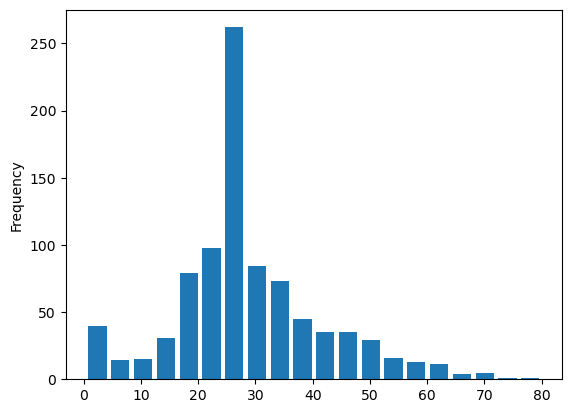

In [ ]:
titanic_df['Age'].plot(kind='hist', bins=20, rwidth=0.8)
# rwidth -> 막대기의 넓이

In [149]:
titanic_df['Cabin'].unique().tolist()

[nan,
 'C85',
 'C123',
 'E46',
 'G6',
 'C103',
 'D56',
 'A6',
 'C23 C25 C27',
 'B78',
 'D33',
 'B30',
 'C52',
 'B28',
 'C83',
 'F33',
 'F G73',
 'E31',
 'A5',
 'D10 D12',
 'D26',
 'C110',
 'B58 B60',
 'E101',
 'F E69',
 'D47',
 'B86',
 'F2',
 'C2',
 'E33',
 'B19',
 'A7',
 'C49',
 'F4',
 'A32',
 'B4',
 'B80',
 'A31',
 'D36',
 'D15',
 'C93',
 'C78',
 'D35',
 'C87',
 'B77',
 'E67',
 'B94',
 'C125',
 'C99',
 'C118',
 'D7',
 'A19',
 'B49',
 'D',
 'C22 C26',
 'C106',
 'C65',
 'E36',
 'C54',
 'B57 B59 B63 B66',
 'C7',
 'E34',
 'C32',
 'B18',
 'C124',
 'C91',
 'E40',
 'T',
 'C128',
 'D37',
 'B35',
 'E50',
 'C82',
 'B96 B98',
 'E10',
 'E44',
 'A34',
 'C104',
 'C111',
 'C92',
 'E38',
 'D21',
 'E12',
 'E63',
 'A14',
 'B37',
 'C30',
 'D20',
 'B79',
 'E25',
 'D46',
 'B73',
 'C95',
 'B38',
 'B39',
 'B22',
 'C86',
 'C70',
 'A16',
 'C101',
 'C68',
 'A10',
 'E68',
 'B41',
 'A20',
 'D19',
 'D50',
 'D9',
 'A23',
 'B50',
 'A26',
 'D48',
 'E58',
 'C126',
 'B71',
 'B51 B53 B55',
 'D49',
 'B5',
 'B20',
 'F G

In [150]:
# Cabin NaN -> 'unknown'으로 채우기
titanic_df['Cabin'].fillna('Unknown', inplace=True)

In [151]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [154]:
titanic_df['Cabin'].value_counts().head(10)

Cabin
Unknown        687
G6               4
C23 C25 C27      4
B96 B98          4
F2               3
D                3
E101             3
C22 C26          3
F33              3
C83              2
Name: count, dtype: int64

# Embarked 속성

In [157]:
titanic_df['Embarked'].value_counts()
# C = Cherbourg > 부유한 1등석 비율 높>> 생존율도 높, Q = Queenstown, S = Southampton > 주로 노동자 계급의 3등석 비율 높

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

Axes(0.125,0.11;0.775x0.77)


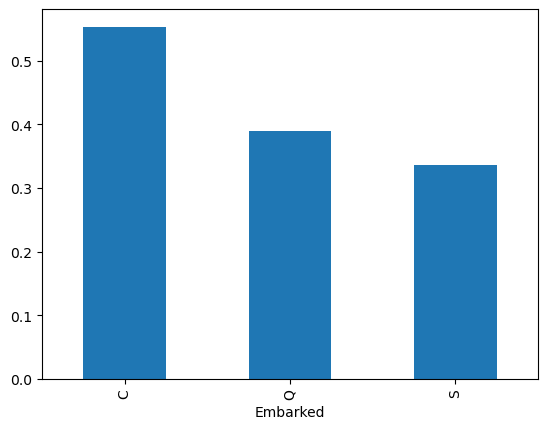

In [164]:
print (titanic_df.groupby('Embarked')['Survived'].mean().plot(kind='bar'))

In [168]:
# 'Embarked'를 각각의 열로 쪼개기 (get_dummies)
embarked_dummies = pd.get_dummies(titanic_df['Embarked'], prefix='Port')

# 기존 데이터와 합치기
df_with_dummies = pd.concat([titanic_df[['Survived']], embarked_dummies], axis=1)

# 이제 상관계수 구하기!
print(df_with_dummies.corr()['Survived'])

Survived    1.00000
Port_C      0.16824
Port_Q      0.00365
Port_S     -0.15566
Name: Survived, dtype: float64


# 범주형 데이터 인코딩
## 원핫인코딩 
- 원핫인코딩은 남성이면 > 메일에 1값, 피메일에  0값, 여성이면 메일에 0값, 피메일에 1값을 부여 하는 형태.

In [169]:
titanic_df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [ ]:
# 겟더미스(데이터프레임, 칼럼=[구분할 칼럼] )
pd.get_dummies(titanic_df, columns=['Sex', 'Embarked']).head(5)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,Unknown,False,True,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,True,False,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,Unknown,True,False,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,True,False,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,Unknown,False,True,False,False,True


## label encoding 
레이블(라벨)인코딩 ->  얘는 그냥 메일이면 0, 피메일이면1 부여 ->원핫인코딩x

In [ ]:
## label encoding -> 얘는 그냥 메일이면 0, 피메일이면1 부여 ->원핫인코딩x
titanic_df['Sex'].map({'male':0,'female':1})

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64